In [40]:
import numpy as np
import scipy as sp
import doctest # To test the code with the examples in the docstring of the functions

# II.B. Eigenface Method

In [83]:
def averageFace(Q : np.array) -> np.array :
    """
    Compute the average face of a set of images (sketches or photos)

    Parameters
    ----------
    Q : np.array
        A 2D numpy array of shape (n, m) where n is the number of pixels in each image and m is the number of images.
        
    Returns
    -------
    np.array
        A 2D numpy array of shape (n, 1) containing the average face.
    """
    return np.mean(Q, axis=1).reshape(-1,1)

def eigenfaces(Q : np.array) -> np.array :
    """ 
    Implementation of the eigenfaces algorithm

    Parameters
    ----------
    Q : np.array
        A 2D numpy array of shape (n, m) where n is the number of pixels in each image and m is the number of images
    
    Returns
    -------
    np.array
        A 2D numpy array of shape (n, m) containing the eigenfaces
    np.array
        A 2D numpy array of shape (n, m) containing the eigenvectors
    np.array
        A 2D numpy array of shape (m, m) containing the matrix of eigenvalues after transformations

    >>> eigenfaces(np.array([[2,0],[0,5]]))[0].shape
    (2, 2)

    """
    # Compute the mean of the columns of Q (mean image)
    mp = averageFace(Q)
    # Subtract the mean from each column of Q
    Ap = Q - mp
    # Compute eigenvector matrix and eigenvalues of Atp*Ap
    eigvals, Vp = np.linalg.eig(np.matmul(Ap.transpose(),Ap))
    # Compute the orthormal eigenvector matrix of the covariance matrix
    # eigPower = np.linalg.inv(sp.linalg.sqrtm(np.diag(eigvals)))
    eigPower = np.linalg.inv(sp.linalg.sqrtm(np.diag(eigvals)))
    Up = np.matmul(np.matmul(Ap,Vp),eigPower)

    return Up, Vp, eigPower

def featuresEigenfaces(Up : np.array, P : np.array) -> np.array :
    """
    Implementation of the featuresEigenfaces algorithm.

    Parameters
    ----------
    Up : np.array
        A 2D numpy array of shape (n, m) containing the eigenfaces.
    P : np.array
        A 2D numpy array of shape (n, k) where n is the number of pixels in each image and k is the number of images.

    Returns
    -------
    np.array
        A 2D numpy array of shape (m, k) containing the features of the images.
    """
    return np.matmul(Up.transpose(),P)

In [58]:
# use doctest to test the functions
doctest.testmod(verbose=True)

Trying:
    eigenfaces(np.array([[2,0],[0,5]]))[0].shape
Expecting:
    (2, 2)
ok
4 items had no tests:
    __main__
    __main__.averageFace
    __main__.featuresEigenfaces
    __main__.getData
1 items passed all tests:
   1 tests in __main__.eigenfaces
1 tests in 5 items.
1 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=1)

In [4]:
def getData(path : str) -> np.array:
    """
    Reads the images data in the given path and returns it as a numpy array (each column represent an image)

    Parameters
    ----------
    path : str
        The path to the directory containing the images data.

    Returns
    -------
    np.array
        A 2D numpy array of shape (n, m) where n is the number of pixels in each image and m is the number of images.
    """
    import os
    from PIL import Image
    # Initialize the array of images
    dir = os.listdir(path)
    img = Image.open(path + dir[0])
    # if image has 3 channels, convert it to grayscale
    img = img.convert('L') if len(np.array(img).shape) == 3 else img

    nbPixels = np.array(img).flatten().shape

    images = np.empty((nbPixels[0],len(dir)))

    for i,filename in enumerate(dir):
        img = Image.open(path + filename)
        # if image has 3 channels, convert it to grayscale
        img = img.convert('L') if len(np.array(img).shape) == 3 else img

        images[:,i] = np.array(img).flatten().transpose()

    return images

In [5]:
images = getData("./data/photos/")

eigenfacesMatrix, _, _ = eigenfaces(images)

features = featuresEigenfaces(eigenfacesMatrix, images)

C:\Users\maila\AppData\Local\Temp\ipykernel_14372\350185592.py:46: RuntimeWarning: invalid value encountered in sqrt
  eigPower = np.linalg.inv(np.sqrt(np.diag((eigvals))))


# III.A. Photo-to-Sketch Transformation

> In this section, we reimplement the III.A part of the article, following the 6 steps described

In [85]:
photoSet = getData("./data/photos/")
sketchSet = getData("./data/sketches/")

# split the data into training and testing sets for the photos
trainingSet = photoSet[:,:int(photoSet.shape[1]*0.8)]
testingSet = photoSet[:,int(photoSet.shape[1]*0.8):]

inputImage = testingSet[:,0].reshape(-1,1)

# Step 1
mp = averageFace(photoSet)
ms = averageFace(sketchSet)

# Step 2
Up, Vp, eigPower = eigenfaces(photoSet)

# Step 3
Pk = inputImage - mp

# Step 4
bp = featuresEigenfaces(Up, Pk)

# Step 5 : Reconstruction of the pseudo-sketch
As = sketchSet - ms
Sr = np.matmul(np.matmul(np.dot(As,Vp), eigPower),bp)

# Step 6 :
Tr = Sr + ms


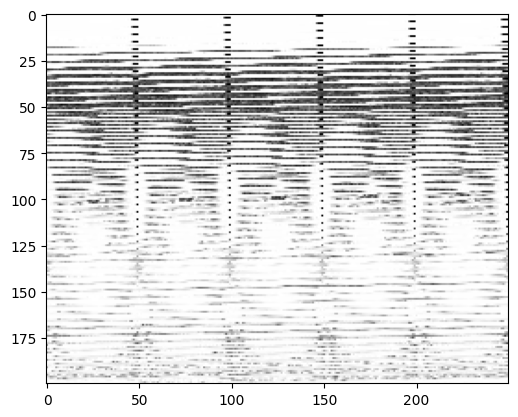

In [87]:
trTest = Tr.real

trTest.reshape(200,250)
import matplotlib.pyplot as plt
plt.imshow(trTest.reshape(200,250), cmap='gray')